### Problem Statement: 
According to the CDC, heart disease is a leading cause of death for people of most races in the U.S. (African Americans, American Indians and Alaska Natives, and whites). 
About half of all Americans (47%) have at least 1 of 3 major risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetes status, obesity (high BMI), not getting enough physical activity, or drinking too much alcohol. 
Identifying and preventing the factors that have the greatest impact on heart disease is very important in healthcare. 
In turn, developments in computing allow the application of machine learning methods to detect "patterns" in the data that can predict a patient's condition.

In [1]:
# Importing liberaries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 40)

In [2]:
# Reading the data set

df = pd.read_csv(r"C:\Users\pooja\Desktop\BIO DESIGN ASSIGNMENT\heart_2022_with_nans.csv\heart_2022_with_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
# Finding the shape of the data
df.shape

(445132, 40)

In [4]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

# Handling Missing values

In [6]:
null_values = round(df.isnull().sum()/len(df)*100),2
null_values

(State                         0.0
 Sex                           0.0
 GeneralHealth                 0.0
 PhysicalHealthDays            2.0
 MentalHealthDays              2.0
 LastCheckupTime               2.0
 PhysicalActivities            0.0
 SleepHours                    1.0
 RemovedTeeth                  3.0
 HadHeartAttack                1.0
 HadAngina                     1.0
 HadStroke                     0.0
 HadAsthma                     0.0
 HadSkinCancer                 1.0
 HadCOPD                       0.0
 HadDepressiveDisorder         1.0
 HadKidneyDisease              0.0
 HadArthritis                  1.0
 HadDiabetes                   0.0
 DeafOrHardOfHearing           5.0
 BlindOrVisionDifficulty       5.0
 DifficultyConcentrating       5.0
 DifficultyWalking             5.0
 DifficultyDressingBathing     5.0
 DifficultyErrands             6.0
 SmokerStatus                  8.0
 ECigaretteUsage               8.0
 ChestScan                    13.0
 RaceEthnicityCatego

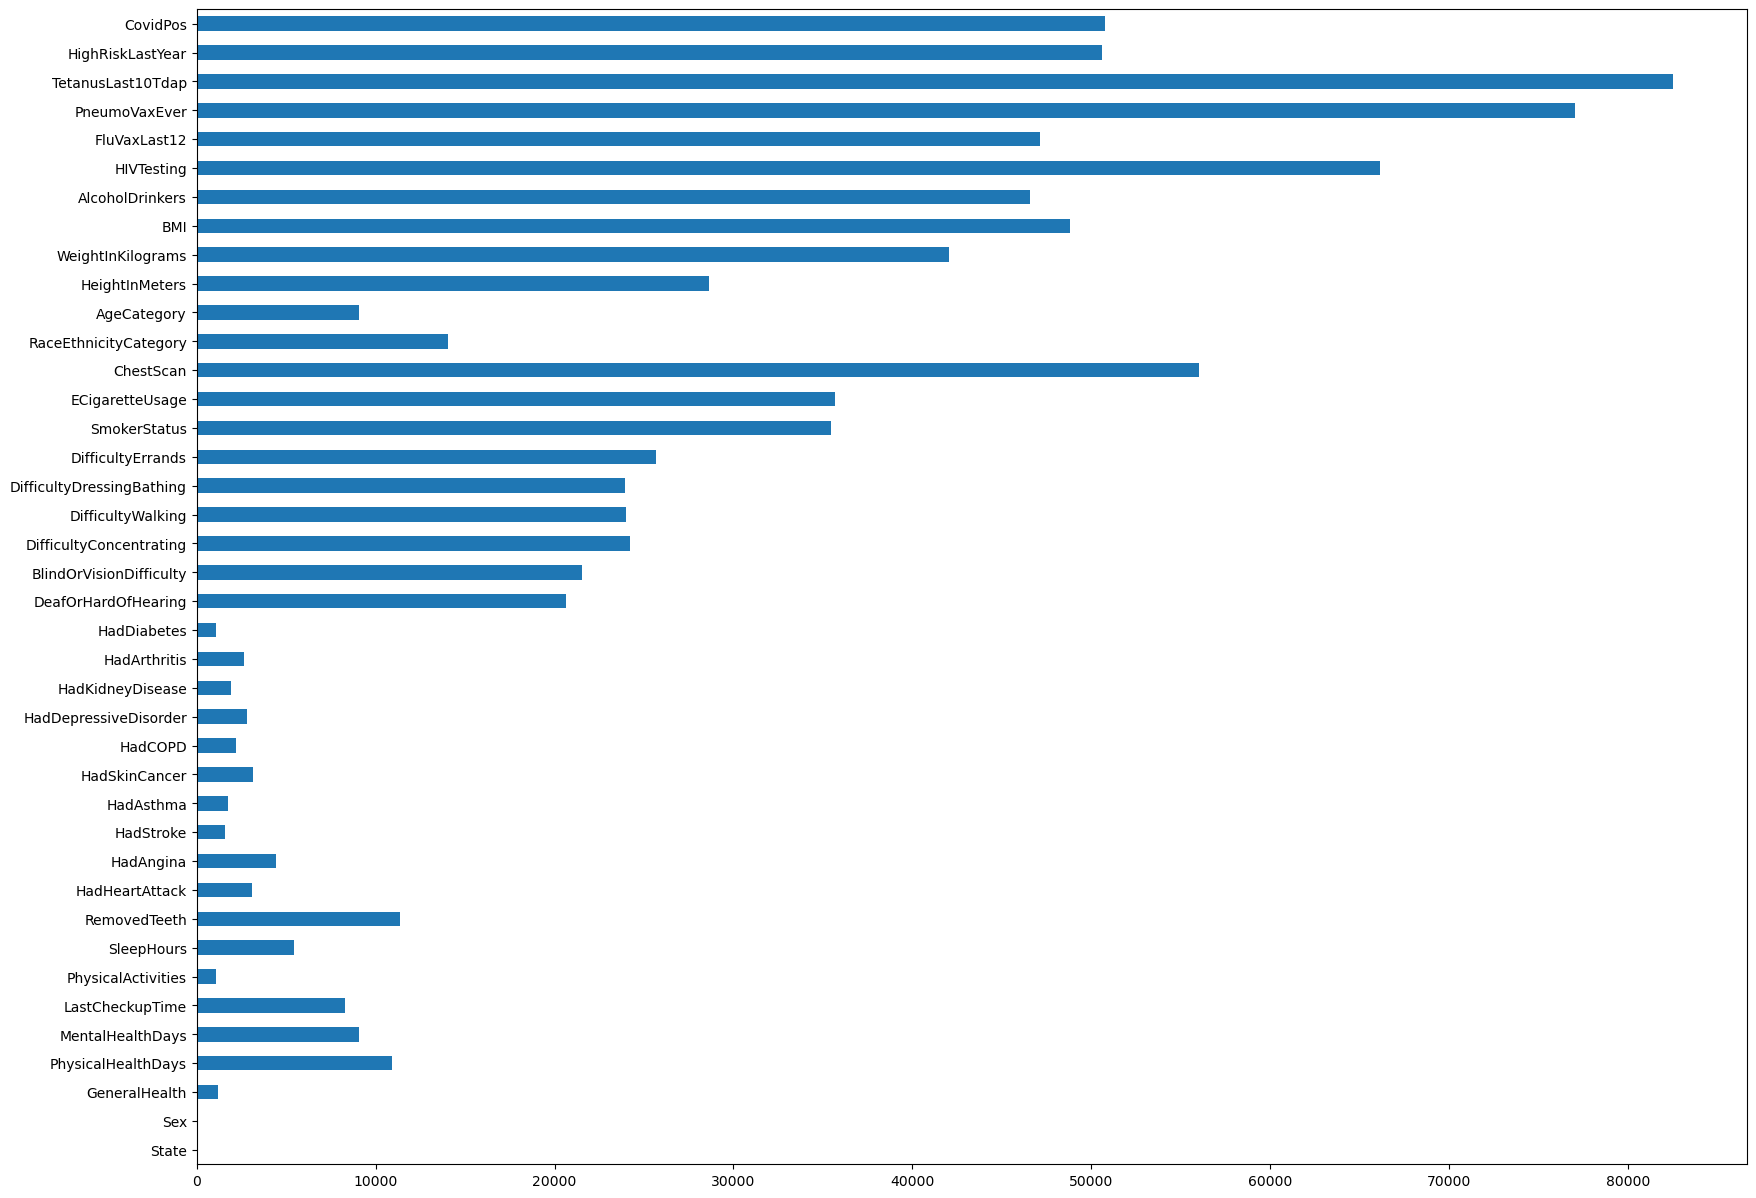

In [7]:
plt.figure(figsize=(20,15))
df.isna().sum().plot(kind='barh')
plt.show()

In [8]:
# Dropping the columns which are not required for analysis.
df = df.drop(columns=["State", "RemovedTeeth", "LastCheckupTime", 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 
                      'TetanusLast10Tdap', 'HighRiskLastYear'])

In [9]:
df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'CovidPos'],
      dtype='object')

In [10]:
df.describe(include = "object")

,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,CovidPos
count,445132,443934,444039,442067,440727,443575,443359,441989,442913,442320,443206,442499,444045,424485,423568,420892,421120,421217,419476,409670,409472,431075,436053,398558,394368
unique,2,5,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,4,4,5,13,2,3
top,Female,Very good,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No
freq,235893,148444,337559,416959,414176,424336,376665,406504,407257,350910,422891,291351,368722,385539,399910,370792,353039,404404,387029,245955,311988,320421,47099,210891,270055


In [11]:
for col in df.describe(include = "object").columns:
    print("columns_name :", col)
    print(df[col].unique())
    print("-"*10)

columns_name : Sex
['Female' 'Male']
----------
columns_name : GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
----------
columns_name : PhysicalActivities
['No' 'Yes' nan]
----------
columns_name : HadHeartAttack
['No' 'Yes' nan]
----------
columns_name : HadAngina
['No' 'Yes' nan]
----------
columns_name : HadStroke
['No' 'Yes' nan]
----------
columns_name : HadAsthma
['No' 'Yes' nan]
----------
columns_name : HadSkinCancer
['No' 'Yes' nan]
----------
columns_name : HadCOPD
['No' 'Yes' nan]
----------
columns_name : HadDepressiveDisorder
['No' 'Yes' nan]
----------
columns_name : HadKidneyDisease
['No' 'Yes' nan]
----------
columns_name : HadArthritis
['No' 'Yes' nan]
----------
columns_name : HadDiabetes
['Yes' 'No' 'No, pre-diabetes or borderline diabetes' nan
 'Yes, but only during pregnancy (female)']
----------
columns_name : DeafOrHardOfHearing
['No' nan 'Yes']
----------
columns_name : BlindOrVisionDifficulty
['No' 'Yes' nan]
----------
columns_name : Difficul

### Handling Missing values in "Object" columns

In [12]:
df["Sex"].value_counts(dropna =False)

Female    235893
Male      209239
Name: Sex, dtype: int64

In [13]:
df["GeneralHealth"].value_counts(dropna= False)

Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
NaN            1198
Name: GeneralHealth, dtype: int64

In [14]:
df["GeneralHealth"] = df["GeneralHealth"].replace(np.nan, "Very good")

In [15]:
df["PhysicalActivities"].value_counts(dropna =False)

Yes    337559
No     106480
NaN      1093
Name: PhysicalActivities, dtype: int64

In [16]:
df["PhysicalActivities"] = df["PhysicalActivities"].replace(np.nan, "Yes")

In [17]:
df["HadHeartAttack"].value_counts(dropna= False)

No     416959
Yes     25108
NaN      3065
Name: HadHeartAttack, dtype: int64

In [18]:
df["HadHeartAttack"] =df["HadHeartAttack"].replace(np.nan , "No")

In [19]:
df["HadAngina"].value_counts(dropna= False)

No     414176
Yes     26551
NaN      4405
Name: HadAngina, dtype: int64

In [20]:
df["HadAngina"] = df["HadAngina"].replace(np.nan, "No")

In [21]:
df["HadStroke"].value_counts(dropna = False)

No     424336
Yes     19239
NaN      1557
Name: HadStroke, dtype: int64

In [22]:
df["HadStroke"] = df["HadStroke"].replace(np.nan, "No")

In [23]:
df["HadAsthma"].value_counts(dropna= False)

No     376665
Yes     66694
NaN      1773
Name: HadAsthma, dtype: int64

In [24]:
df["HadAsthma"] = df["HadAsthma"].replace(np.nan , "No")

In [25]:
df["HadSkinCancer"].value_counts(dropna= False)

No     406504
Yes     35485
NaN      3143
Name: HadSkinCancer, dtype: int64

In [26]:
df["HadSkinCancer"] = df["HadSkinCancer"].replace(np.nan, "No")

In [27]:
df["HadCOPD"].value_counts(dropna=False)

No     407257
Yes     35656
NaN      2219
Name: HadCOPD, dtype: int64

In [28]:
df["HadCOPD"] = df["HadCOPD"].replace(np.nan , "No")

In [29]:
df["HadDepressiveDisorder"].value_counts(dropna= False)

No     350910
Yes     91410
NaN      2812
Name: HadDepressiveDisorder, dtype: int64

In [30]:
df["HadDepressiveDisorder"] = df["HadDepressiveDisorder"].replace(np.nan , "No")

In [31]:
df["HadKidneyDisease"].value_counts(dropna = False)

No     422891
Yes     20315
NaN      1926
Name: HadKidneyDisease, dtype: int64

In [32]:
df["HadKidneyDisease"] = df["HadKidneyDisease"].replace(np.nan , "No")

In [33]:
df["HadArthritis"].value_counts(dropna= False)

No     291351
Yes    151148
NaN      2633
Name: HadArthritis, dtype: int64

In [34]:
df["HadArthritis"] = df["HadArthritis"].replace(np.nan, "No")

In [35]:
df["HadDiabetes"].value_counts(dropna= False)

No                                         368722
Yes                                         61158
No, pre-diabetes or borderline diabetes     10329
Yes, but only during pregnancy (female)      3836
NaN                                          1087
Name: HadDiabetes, dtype: int64

In [36]:
df["HadDiabetes"] = df["HadDiabetes"].replace(np.nan, "No")
df.replace('No, pre-diabetes or borderline diabetes', 'No', inplace=True)
df.replace("Yes, but only during pregnancy (female)", 'Yes', inplace=True)

df["HadDiabetes"].value_counts()

No     380138
Yes     64994
Name: HadDiabetes, dtype: int64

In [37]:
df["DeafOrHardOfHearing"].value_counts(dropna= False)

No     385539
Yes     38946
NaN     20647
Name: DeafOrHardOfHearing, dtype: int64

In [38]:
df["DeafOrHardOfHearing"] = df["DeafOrHardOfHearing"].replace(np.nan, "No")

In [39]:
df["BlindOrVisionDifficulty"].value_counts(dropna= False)

No     399910
Yes     23658
NaN     21564
Name: BlindOrVisionDifficulty, dtype: int64

In [40]:
df["BlindOrVisionDifficulty"] = df["BlindOrVisionDifficulty"].replace(np.nan,"No" )

In [41]:
df["DifficultyConcentrating"].value_counts(dropna= False)

No     370792
Yes     50100
NaN     24240
Name: DifficultyConcentrating, dtype: int64

In [42]:
df["DifficultyConcentrating"] = df["DifficultyConcentrating"].replace(np.nan, "No")

In [43]:
df["DifficultyWalking"].value_counts(dropna= False)

No     353039
Yes     68081
NaN     24012
Name: DifficultyWalking, dtype: int64

In [44]:
df["DifficultyWalking"] = df["DifficultyWalking"].replace(np.nan, "No")

In [45]:
df["DifficultyDressingBathing"].value_counts(dropna= False)

No     404404
NaN     23915
Yes     16813
Name: DifficultyDressingBathing, dtype: int64

In [46]:
df["DifficultyDressingBathing"] = df["DifficultyDressingBathing"].replace(np.nan, "No")

In [47]:
df["DifficultyErrands"].value_counts(dropna= False)

No     387029
Yes     32447
NaN     25656
Name: DifficultyErrands, dtype: int64

In [48]:
df["DifficultyErrands"] = df["DifficultyErrands"].replace(np.nan, "No")

In [49]:
df["SmokerStatus"].value_counts(dropna= False)

Never smoked                             245955
Former smoker                            113774
Current smoker - now smokes every day     36003
NaN                                       35462
Current smoker - now smokes some days     13938
Name: SmokerStatus, dtype: int64

In [50]:
df["SmokerStatus"] = df["SmokerStatus"].replace(np.nan, "Other")

In [51]:
df["ECigaretteUsage"].value_counts(dropna= False)

Never used e-cigarettes in my entire life    311988
Not at all (right now)                        75368
NaN                                           35660
Use them some days                            11734
Use them every day                            10382
Name: ECigaretteUsage, dtype: int64

In [52]:
df["ECigaretteUsage"] = df["ECigaretteUsage"].replace(np.nan, "Other")

In [53]:
df["RaceEthnicityCategory"].value_counts(dropna= False)

White only, Non-Hispanic         320421
Hispanic                          42917
Black only, Non-Hispanic          35446
Other race only, Non-Hispanic     22713
NaN                               14057
Multiracial, Non-Hispanic          9578
Name: RaceEthnicityCategory, dtype: int64

In [54]:
df["RaceEthnicityCategory"] = df["RaceEthnicityCategory"].replace(np.nan, "Other")

In [55]:
df["AlcoholDrinkers"].value_counts(dropna= False)

Yes    210891
No     187667
NaN     46574
Name: AlcoholDrinkers, dtype: int64

In [56]:
df["AlcoholDrinkers"] = df["AlcoholDrinkers"].replace(np.nan, "Yes")

In [57]:
df["CovidPos"].value_counts(dropna= False)

No                                                               270055
Yes                                                              110877
NaN                                                               50764
Tested positive using home test without a health professional     13436
Name: CovidPos, dtype: int64

In [58]:
df["CovidPos"] = df["CovidPos"].replace(np.nan , "No")

In [59]:
df["CovidPos"] = df["CovidPos"].replace("Tested positive using home test without a health professional" , "Yes")

In [60]:
df["AgeCategory"] = df["AgeCategory"]. replace(np.nan, "Age 65 to 69")

In [61]:
df["PhysicalHealthDays"].value_counts(dropna = False)
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mean(), inplace=True)

In [62]:
df["MentalHealthDays"].value_counts(dropna = False)
df['MentalHealthDays'].fillna(df['MentalHealthDays'].mean(), inplace=True)

In [63]:
df["SleepHours"].value_counts(dropna = False)
df['SleepHours'].fillna(df['SleepHours'].mean(), inplace=True)

In [64]:
df["HeightInMeters"].value_counts(dropna = False)
df['HeightInMeters'].fillna(df['HeightInMeters'].mean(), inplace=True)

In [65]:
df["WeightInKilograms"].value_counts(dropna = False)
df['WeightInKilograms'].fillna(df['WeightInKilograms'].mean(), inplace=True)

In [66]:
df["BMI"].value_counts(dropna = False)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [67]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.581602,8.301612,1.493194,0.103671,20.409269,6.185106
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.490000,24.410000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,28.290000
75%,4.000000,4.382649,8.000000,1.780000,91.630000,31.010000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


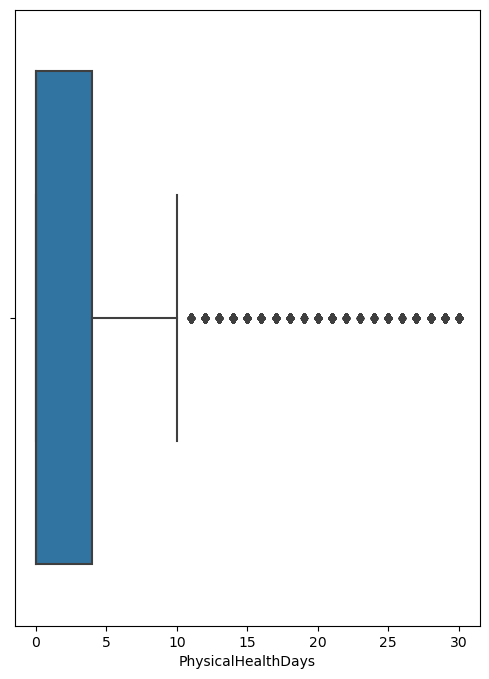

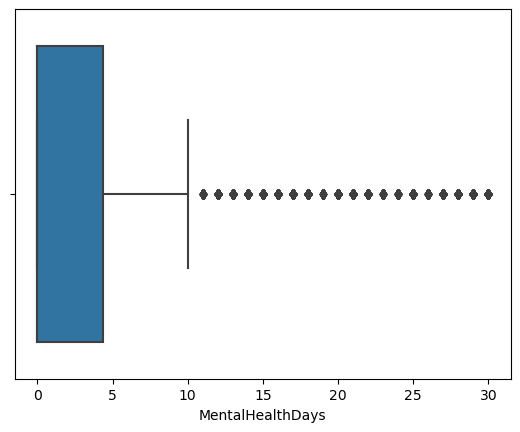

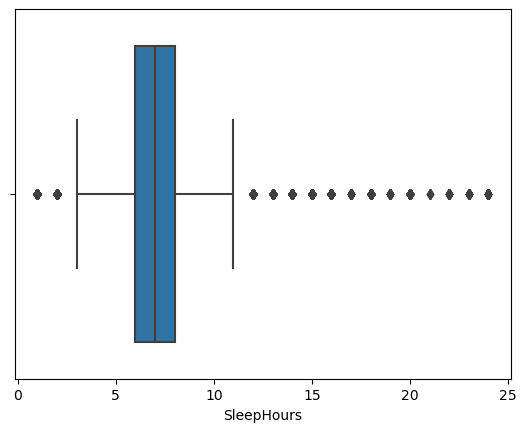

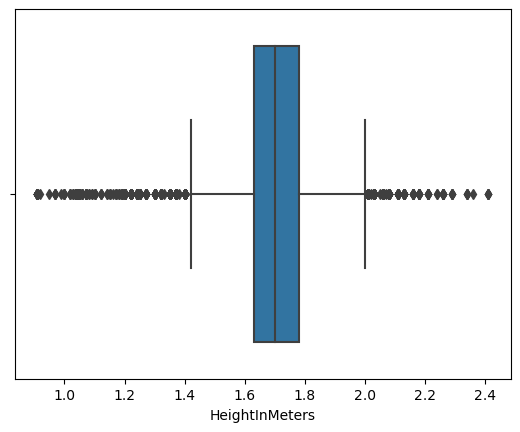

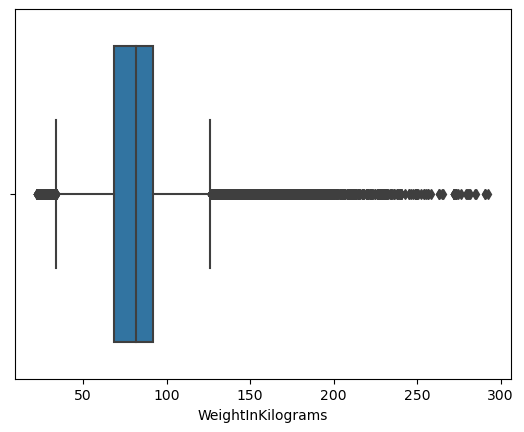

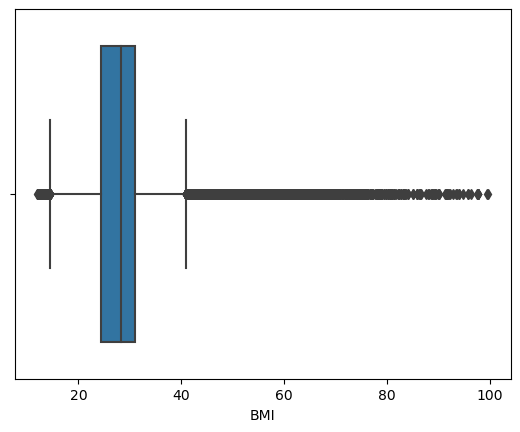

In [68]:
plt.figure(figsize =(6,8))
for col in df.describe().columns:
    sns.boxplot(data= df, x=col)
    plt.show()

# Handling Outliers

In [69]:
# Function for extracting outliers in column of dataframe
def get_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    return outliers, lower_limit, upper_limit

In [70]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepHours')
sleep_hours_outliers

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
88,Female,Excellent,0.000000,0.000000,No,1.0,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 60 to 64,1.600000,54.43000,21.260000,No,No
95,Male,Poor,4.347919,0.000000,Yes,12.0,No,No,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.830000,106.59000,31.870000,Yes,No
118,Female,Poor,30.000000,30.000000,No,18.0,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.500000,47.17000,21.010000,No,No
127,Male,Very good,0.000000,2.000000,Yes,12.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 60 to 64,1.730000,50.80000,17.030000,No,No
208,Female,Poor,25.000000,0.000000,Yes,12.0,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,1.630000,136.08000,51.490000,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444948,Female,Fair,2.000000,1.000000,Yes,18.0,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 60 to 64,1.650000,99.79000,36.610000,Yes,No
445066,Male,Very good,4.347919,0.000000,Yes,20.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 80 or older,1.800000,86.18000,26.500000,No,No
445103,Female,Good,10.000000,0.000000,No,12.0,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Other,Other,Hispanic,Age 75 to 79,1.702691,83.07447,28.529842,Yes,No
445108,Female,Good,5.000000,4.382649,Yes,18.0,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.550000,58.97000,24.560000,No,No


In [71]:
print(f"Lower Limit(SleepHours):{lower_sleep})\nUpper Limit(SleepHours):{upper_sleep})")

Lower Limit(SleepHours):3.0)
Upper Limit(SleepHours):11.0)


The Upper Limit of SleepHours is questionnable so we will adjust this according to our own assumption

Dropping rows with outlier values in sleeping hours as data seems incorrect, some people have excellent health condition with sleeping more than 13 hours and also less than 3 hours,
that seems to be incorrect readings.

In [72]:
# Dropping records with sleep less than 3 hours
df = df.drop(df[df['SleepHours'] < lower_sleep].index)
df.reset_index(drop=True, inplace=True)
df.shape

(442429, 31)

In [73]:
# Dropping record with sleep greater than 16 hourss
df = df.drop(df[df['SleepHours'] > 13].index)
df.reset_index(drop=True, inplace=True)
df.shape

(441041, 31)

<Axes: xlabel='SleepHours'>

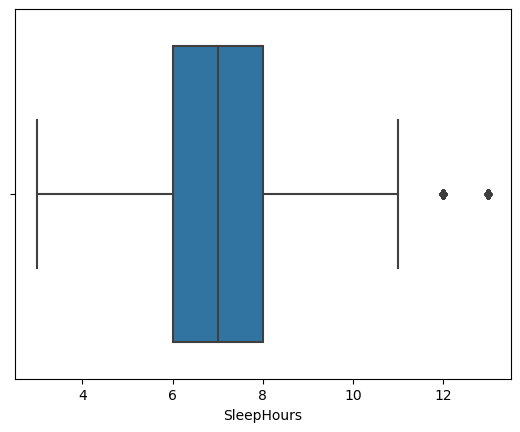

In [74]:
sns.boxplot(data= df, x='SleepHours')

In [75]:
height_outliers, lower_height, upper_height = get_outliers(df, 'HeightInMeters')
height_outliers

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
552,Female,Fair,30.0,0.0,No,6.000000,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,1.24,86.18,55.64,No,No
869,Female,Poor,30.0,30.0,No,9.000000,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,1.22,136.08,91.55,No,No
896,Female,Fair,30.0,0.0,No,8.000000,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 75 to 79,1.22,44.91,30.21,No,No
1524,Male,Good,0.0,0.0,No,7.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,Age 45 to 49,2.03,70.31,17.03,No,No
1541,Male,Very good,0.0,0.0,No,8.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Current smoker - now smokes every day,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,2.01,95.25,23.66,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440613,Male,Very good,0.0,0.0,Yes,7.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 30 to 34,2.13,68.04,14.95,No,No
440639,Male,Very good,1.0,0.0,Yes,7.022983,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 60 to 64,1.27,63.50,39.37,No,No
440765,Male,Poor,30.0,25.0,No,5.000000,Yes,Yes,No,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,"Multiracial, Non-Hispanic",Age 50 to 54,2.01,106.14,26.36,Yes,Yes
440852,Female,Fair,0.0,0.0,Yes,8.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 75 to 79,1.35,63.05,34.79,No,No


In [76]:
print(f"Lower Limit(Height):{lower_height})\nUpper Limit(Height):{upper_height})")

Lower Limit(Height):1.4049999999999998)
Upper Limit(Height):2.0050000000000003)


The lower limit seems a bit strict because some adults can be shorter than 1.4 meters.
Similarly, the upper limit might be too narrow because some people can be taller than 2 meters. 
We'll change these limits based on our own ideas or assumptions.

In [77]:
df[df['HeightInMeters'] < 1.3]

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
552,Female,Fair,30.0,0.0,No,6.000000,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,1.24,86.18000,55.640000,No,No
869,Female,Poor,30.0,30.0,No,9.000000,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,1.22,136.08000,91.550000,No,No
896,Female,Fair,30.0,0.0,No,8.000000,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 75 to 79,1.22,44.91000,30.210000,No,No
2356,Female,Good,0.0,0.0,Yes,7.000000,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 50 to 54,1.22,45.81000,30.820000,No,Yes
8995,Male,Fair,0.0,1.0,No,6.000000,No,Yes,No,No,No,No,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,Former smoker,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,0.91,95.25000,28.529842,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436793,Female,Good,14.0,14.0,Yes,5.000000,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,Age 75 to 79,1.27,45.36000,28.120000,No,No
437550,Female,Fair,0.0,0.0,No,5.000000,No,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,Age 60 to 64,1.22,74.39000,50.040000,No,No
438776,Female,Fair,0.0,0.0,No,8.000000,No,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Hispanic,Age 60 to 64,1.27,73.03000,45.280000,No,No
439818,Female,Good,0.0,0.0,Yes,8.000000,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Other,Other,"Black only, Non-Hispanic",Age 65 to 69,1.22,83.07447,28.529842,Yes,No


In [78]:
df[df['HeightInMeters'] > 2.1]

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
5233,Male,Excellent,0.0,5.0,Yes,7.0,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 30 to 34,2.11,70.31,15.82,Yes,No
8420,Male,Very good,0.0,0.0,Yes,7.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,2.16,83.91,18.00,Yes,No
8918,Male,Good,20.0,19.0,Yes,5.0,No,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,Never smoked,Use them some days,"Other race only, Non-Hispanic",Age 18 to 24,2.26,92.53,18.11,No,Yes
9572,Male,Good,10.0,15.0,No,7.0,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 40 to 44,2.16,88.45,18.98,No,Yes
23208,Male,Fair,0.0,0.0,Yes,6.0,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,2.13,181.44,39.86,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403338,Male,Very good,0.0,0.0,Yes,8.0,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,No,Former smoker,Not at all (right now),"White only, Non-Hispanic",Age 55 to 59,2.13,72.57,15.94,No,No
403504,Male,Excellent,0.0,0.0,Yes,6.0,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 40 to 44,2.34,70.31,12.88,Yes,No
407296,Male,Very good,0.0,0.0,Yes,8.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 60 to 64,2.21,137.89,28.24,Yes,No
432099,Male,Poor,30.0,0.0,No,8.0,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Other race only, Non-Hispanic",Age 70 to 74,2.16,77.56,16.64,No,No


In [79]:
# Dropping records with height less than 1.3 meters
df = df.drop(df[df['HeightInMeters'] < 1.3].index)
df.reset_index(drop=True, inplace=True)
df.shape

(440774, 31)

In [80]:
# Dropping records with height greater than 2.1 meters
df = df.drop(df[df['HeightInMeters'] > 2.1].index)
df.reset_index(drop=True, inplace=True)
df.shape

(440670, 31)

<Axes: xlabel='HeightInMeters'>

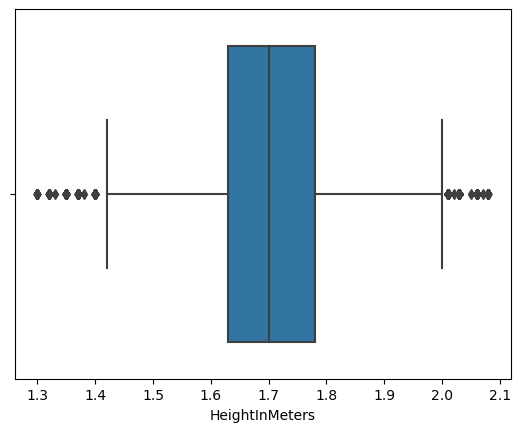

In [81]:
sns.boxplot(data= df, x='HeightInMeters')

In [82]:
weight_outliers, lower_weight, upper_weight = get_outliers(df, 'WeightInKilograms')
weight_outliers

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
48,Female,Good,0.0,18.000000,No,8.000000,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Current smoker - now smokes every day,Not at all (right now),"White only, Non-Hispanic",Age 60 to 64,1.73,136.08,45.61,No,No
54,Male,Fair,3.0,0.000000,Yes,8.000000,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.75,127.01,41.35,No,No
140,Female,Fair,30.0,20.000000,Yes,5.000000,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 35 to 39,1.60,145.15,56.68,No,No
156,Male,Good,0.0,0.000000,No,8.000000,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,1.83,158.76,47.47,No,No
206,Female,Poor,25.0,0.000000,Yes,12.000000,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 75 to 79,1.63,136.08,51.49,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440536,Male,Fair,0.0,0.000000,Yes,6.000000,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 65 to 69,1.75,127.01,41.35,Yes,Yes
440548,Female,Good,2.0,4.382649,No,7.022983,No,No,No,No,No,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 45 to 49,1.68,163.29,58.10,No,No
440569,Female,Good,0.0,0.000000,No,7.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,127.01,43.85,No,Yes
440580,Male,Fair,0.0,0.000000,No,6.000000,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Current smoker - now smokes every day,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.85,130.18,37.86,Yes,No


In [83]:
print(f"Lower Limit(Weight):{lower_weight})\nUpper Limit(Weight):{upper_weight})")

Lower Limit(Weight):33.779999999999994)
Upper Limit(Weight):126.34)


In [84]:
# Dropping records with weight less than 40 kg
df = df.drop(df[df['WeightInKilograms'] < 40].index)
df.reset_index(drop=True, inplace=True)
df.shape

(440069, 31)

In [85]:
# Dropping records with weight greater than 200 kg
df = df.drop(df[df['WeightInKilograms'] > 200].index)
df.reset_index(drop=True, inplace=True)
df.shape

(439798, 31)

<Axes: xlabel='WeightInKilograms'>

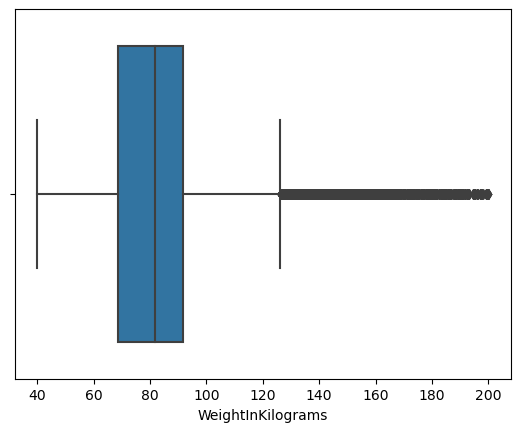

In [86]:
sns.boxplot(data= df, x='WeightInKilograms')

In [87]:
df.isnull().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
PhysicalActivities           0
SleepHours                   0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
CovidPos                     0
dtype: int64

# EDA: Exploratory Data Analysis

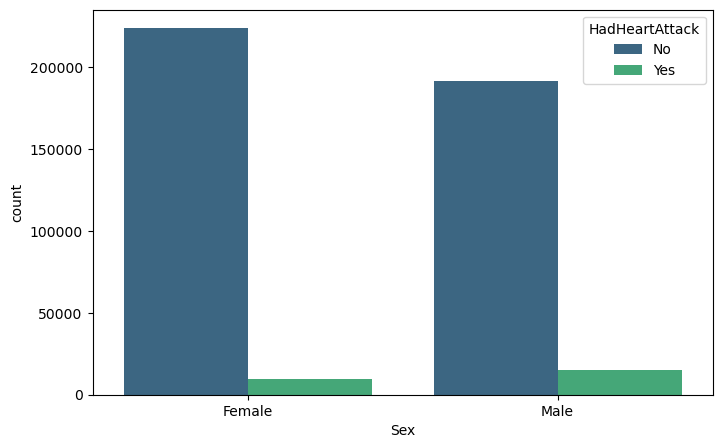

In [88]:
plt.figure(figsize=(8,5))
sns.countplot(x= "Sex", data= df , hue= "HadHeartAttack", palette="viridis")
plt.show()

Many individuals did not experience any heart disease. However, among those who did, the majority were males.

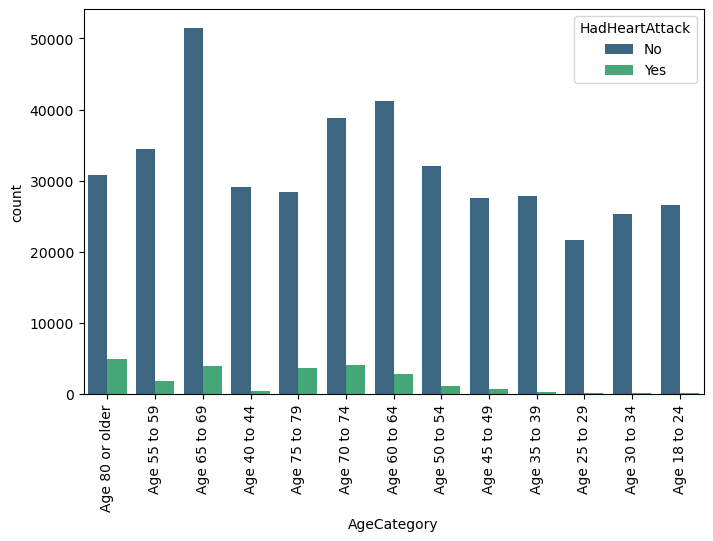

In [89]:
plt.figure(figsize=(8,5))
sns.countplot(x= "AgeCategory", data= df , hue= "HadHeartAttack", palette="viridis")
plt.xticks(rotation=90)
plt.show()

People age above 80 diagonesed with Heartattacks compared to any other age groups.

In [90]:
df['HadObesity'] = df['BMI'].apply(lambda x: 'Yes' if x >=30 else 'No')

## Impact of Risk_Factors

In [91]:
risk_factors = ["PhysicalActivities", 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes', 'HadObesity']


In [92]:
def percentage(ax,df, col ):
    for c in ax.containers:
    
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/df[col].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge')

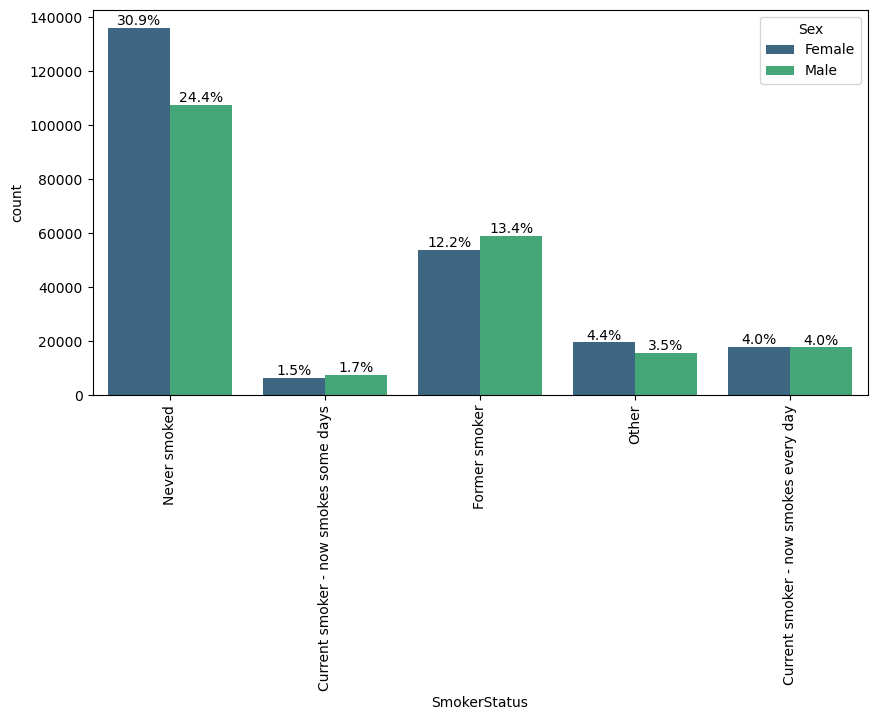

In [93]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x= "SmokerStatus", data= df , hue= "Sex", palette="viridis")
percentage(ax, df, "SmokerStatus")
plt.xticks(rotation=90)
plt.show()

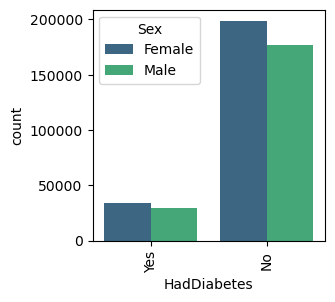

In [94]:
plt.figure(figsize=(3,3))
sns.countplot(x= "HadDiabetes", data= df , hue= "Sex", palette="viridis")
plt.xticks(rotation=90)
plt.show()

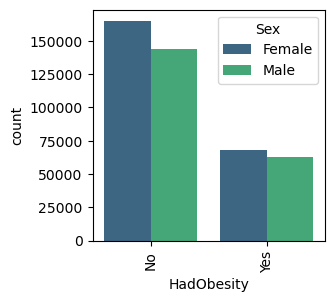

In [95]:
plt.figure(figsize=(3,3))
sns.countplot(x= "HadObesity", data= df , hue= "Sex", palette="viridis")
plt.xticks(rotation=90)
plt.show()

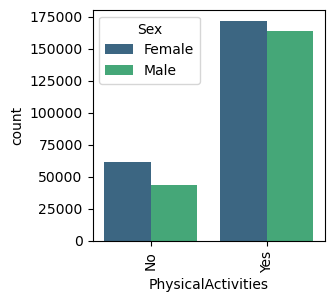

In [96]:
plt.figure(figsize=(3,3))
sns.countplot(x= "PhysicalActivities", data= df , hue= "Sex", palette="viridis")
plt.xticks(rotation=90)
plt.show()

1.The majority of individuals engage in physical activities, with females being the most prevalent among them.
2.The majority of individuals have never smoked in their lives. However, males show a slight lead over females in the category of current smokers
3.Most people are not obese. However, among those who are, females are the most.
4.The majority of individuals do not have diabetes. However, among those who do, females constitute the larger portion.

## Impact of chronic diseases

In [97]:
# Analysing the impact of chronic diseases like stroke, asthma, cancer, copd, arthrities, kindney disease and obesity.

# Subset necessary columns for the analysis
chronic_diseases = df[['HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease', 'HadObesity']]

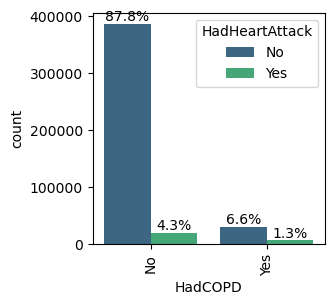

In [98]:
plt.figure(figsize=(3,3))
ax=sns.countplot(x= "HadCOPD",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadCOPD")
plt.xticks(rotation=90)
plt.show()

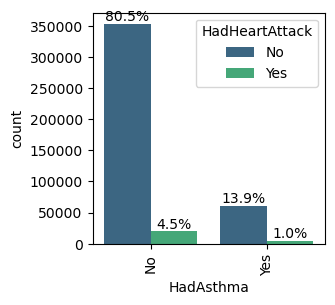

In [99]:
plt.figure(figsize=(3,3))
ax=sns.countplot(x= "HadAsthma",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadAsthma")
plt.xticks(rotation=90)
plt.show()

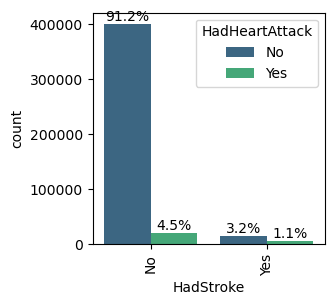

In [100]:
plt.figure(figsize=(3,3))
ax =sns.countplot(x= "HadStroke",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadStroke")
plt.xticks(rotation=90)
plt.show()

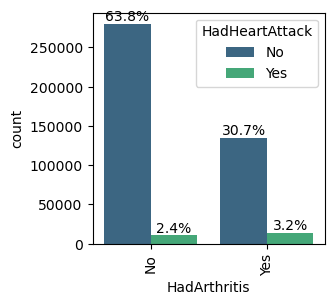

In [101]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x= "HadArthritis",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadArthritis")
plt.xticks(rotation=90)
plt.show()

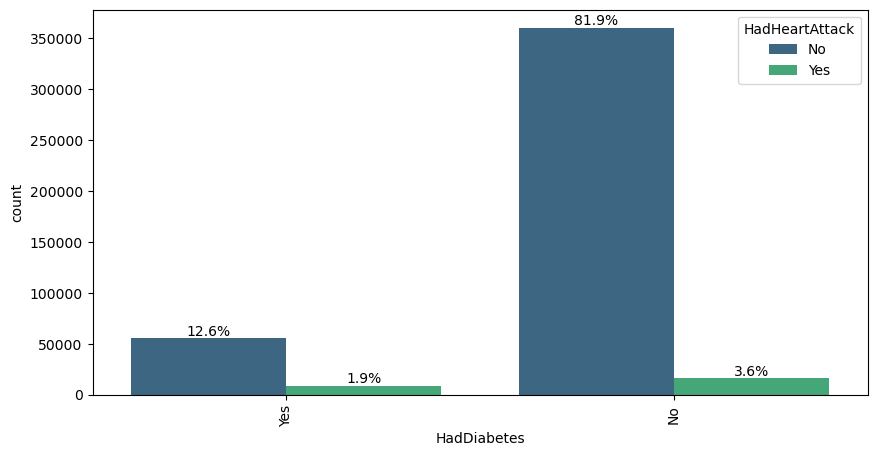

In [102]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x= "HadDiabetes",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadDiabetes")
plt.xticks(rotation=90)
plt.show()

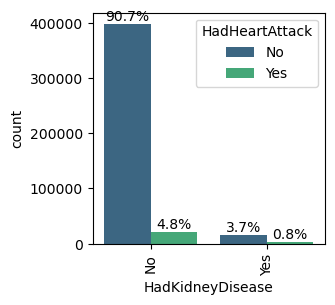

In [103]:
plt.figure(figsize=(3,3))
ax= sns.countplot(x= "HadKidneyDisease",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadKidneyDisease")
plt.xticks(rotation=90)
plt.show()

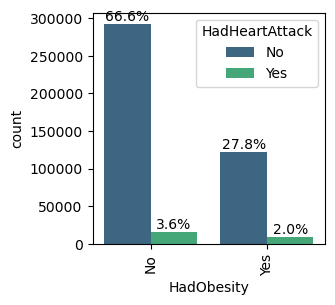

In [104]:
plt.figure(figsize=(3,3))
ax= sns.countplot(x= "HadObesity",hue="HadHeartAttack", data= df , palette="viridis")
percentage(ax, df, "HadObesity")
plt.xticks(rotation=90)
plt.show()

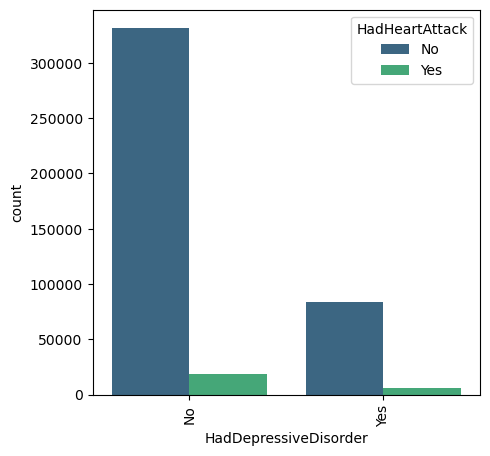

In [105]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x= "HadDepressiveDisorder",hue="HadHeartAttack", data= df , palette="viridis")

plt.xticks(rotation=90)
plt.show()

### Findings:
Almost 30% of the people are obese i.e their BMI is greater than 30.
Certain chronic conditions are not so strongly associated with cardiovascular health disparities.
Individuals previously having chronic diseases such as COPD(Chronic obstructive pulmonary disease), 
diabetes, kidney diseases are more likely to have heart diseases as 7%, 12% and 4% respectively of them are also heart patients.

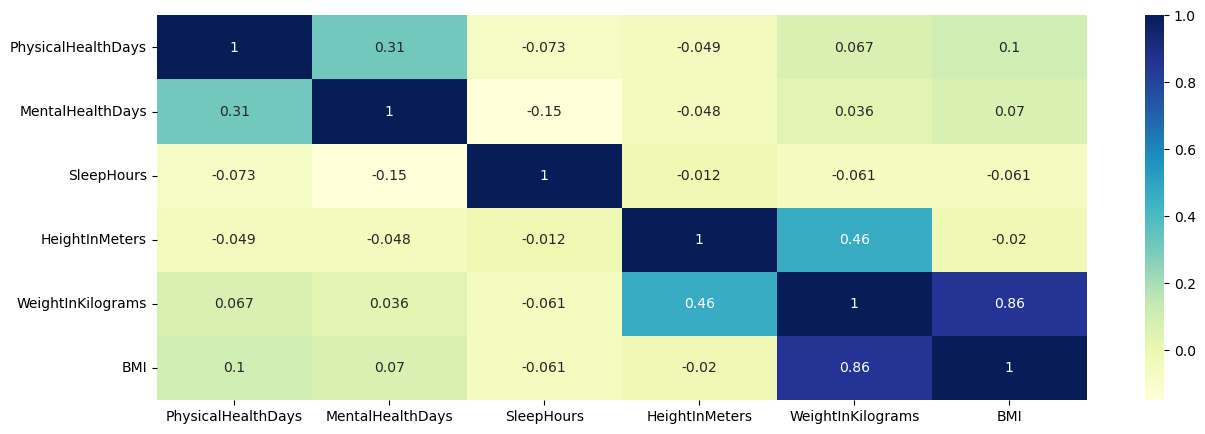

In [106]:
#Checking correlations of numeric values

plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), cmap= "YlGnBu", annot= True)
plt.show()


### Findings:
PhysicalHealth days and MentalHealth days are postively correlated.
Height and weights as well as BMI are also positively correlated.
and SleepHours and MentalHealthDays are negatively Correlated.


In [107]:
covid_count = df['CovidPos'].value_counts()
covid_count

No     316715
Yes    123083
Name: CovidPos, dtype: int64

Text(0.5, 1.0, 'COVID-19 cases among people')

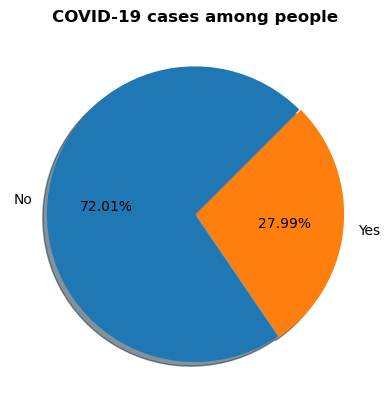

In [108]:
plt.pie(covid_count, labels = covid_count.index, autopct='%.2f%%', explode=[0,0.01], startangle=45, shadow=True)
plt.title('COVID-19 cases among people', fontweight='bold')

The majority of individuals in the dataset have not tested positive for COVID-19, 
with only about 30% of individuals being identified as COVID-19 positive.

In [109]:
three_risk_factors = df[(df['HadObesity']=='Yes') | df['SmokerStatus'].isin(['Current smoker - now smokes every day', 'Current smoker - now smokes some days']) | (df['PhysicalActivities'] == 'No') ]
three_risk_factors

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos,HadObesity
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,1.702691,83.07447,28.529842,No,No,No
1,Female,Excellent,0.0,0.0,No,6.0,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.600000,68.04000,26.570000,No,No,No
3,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,1.650000,63.50000,23.300000,No,No,No
5,Male,Poor,1.0,0.0,No,7.0,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.800000,84.82000,26.080000,No,No,No
7,Female,Good,0.0,0.0,No,8.0,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.630000,73.48000,27.810000,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439786,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 60 to 64,1.880000,88.45000,25.040000,Yes,No,No
439788,Male,Fair,30.0,1.0,No,6.0,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 70 to 74,1.780000,70.31000,22.240000,No,Yes,No
439792,Male,Good,0.0,0.0,Yes,8.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 30 to 34,1.830000,104.33000,31.190000,Yes,Yes,Yes
439795,Female,Poor,30.0,30.0,No,5.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Current smoker - now smokes every day,Use them some days,Other,Age 65 to 69,1.700000,49.90000,17.230000,Yes,No,No


In [110]:
print(round(three_risk_factors.shape[0]/df.shape[0] * 100,2))

49.44


Almost 50% of the population have atleast 1 major risk factor for heart disease.

In [111]:
df.describe(include ="object")

,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,CovidPos,HadObesity
count,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798,439798
unique,2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,5,6,13,2,2,2
top,Female,Very good,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No,No
freq,233096,148590,335248,415289,413772,421032,374139,404648,405034,349969,419967,290782,375974,401632,416871,390993,373481,423739,408505,243352,308673,317431,55479,254904,316715,308951


In [112]:
df.describe(include ="object").columns

Index(['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'CovidPos', 'HadObesity'],
      dtype='object')

## MODEL BUILDING

#### Dummy Variables

In [113]:
dummy = pd.get_dummies(df[['Sex', 'GeneralHealth', 'PhysicalActivities',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'CovidPos', 'HadObesity']], drop_first= True)

In [114]:
df = pd.concat([df, dummy], axis=1)

In [115]:
df = df.drop(['Sex', 'GeneralHealth', 'PhysicalActivities',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'CovidPos', 'HadObesity'], 1)

In [116]:
df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic",RaceEthnicityCategory_Other,"RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes,CovidPos_Yes,HadObesity_Yes
0,0.0,0.0,8.0,No,1.702691,83.07447,28.529842,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,6.0,No,1.600000,68.04000,26.570000,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,3.0,5.0,No,1.570000,63.50000,25.610000,0,0,0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,7.0,No,1.650000,63.50000,23.300000,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,0.0,9.0,No,1.570000,53.98000,21.770000,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [117]:
df["HadHeartAttack"] = df["HadHeartAttack"].map({'Yes':1,'No':0})

### Train and test split Logistic Regression

In [118]:
# importing liberaries

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [119]:
y = df["HadHeartAttack"]

y.head()

X= df.drop("HadHeartAttack", axis=1)

In [120]:
X.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic",RaceEthnicityCategory_Other,"RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes,CovidPos_Yes,HadObesity_Yes
0,0.0,0.0,8.0,1.702691,83.07447,28.529842,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,6.0,1.600000,68.04000,26.570000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,3.0,5.0,1.570000,63.50000,25.610000,0,0,0,0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,7.0,1.650000,63.50000,23.300000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,0.0,9.0,1.570000,53.98000,21.770000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [121]:
# Splitting data into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7 ,test_size = 0.3, random_state = 100)

In [122]:
# Scaling the numerical data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train[['PhysicalHealthDays', 'MentalHealthDays',"SleepHours", 'HeightInMeters', "WeightInKilograms", "BMI"]] = scaler.fit_transform(X_train[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', "HeightInMeters", "WeightInKilograms", "BMI"]])

X_train.head()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic",RaceEthnicityCategory_Other,"RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes,CovidPos_Yes,HadObesity_Yes
187260,-0.386714,2.025980,-0.018283,-0.029305,-0.703489,-0.775930,1,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
416150,-0.504217,-0.525959,0.737678,0.753032,0.840193,0.510015,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
126219,-0.504217,-0.525959,-0.774244,0.459656,0.386198,0.171958,1,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
142553,0.006674,3.119669,-2.286166,-0.002993,0.003505,0.006217,0,1,0,0,0,0,0,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
120618,-0.504217,-0.404439,-0.018283,1.241992,-1.430281,-2.025417,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [123]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE (logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [124]:
# Lets look at the features selected by the mmodel
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PhysicalHealthDays', False, 35),
 ('MentalHealthDays', False, 38),
 ('SleepHours', False, 32),
 ('HeightInMeters', False, 36),
 ('WeightInKilograms', False, 29),
 ('BMI', False, 30),
 ('Sex_Male', True, 1),
 ('GeneralHealth_Fair', True, 1),
 ('GeneralHealth_Good', False, 2),
 ('GeneralHealth_Poor', True, 1),
 ('GeneralHealth_Very good', False, 5),
 ('PhysicalActivities_Yes', False, 28),
 ('HadAngina_Yes', True, 1),
 ('HadStroke_Yes', True, 1),
 ('HadAsthma_Yes', False, 33),
 ('HadSkinCancer_Yes', False, 25),
 ('HadCOPD_Yes', False, 10),
 ('HadDepressiveDisorder_Yes', False, 26),
 ('HadKidneyDisease_Yes', False, 14),
 ('HadArthritis_Yes', False, 22),
 ('HadDiabetes_Yes', False, 4),
 ('DeafOrHardOfHearing_Yes', False, 34),
 ('BlindOrVisionDifficulty_Yes', False, 12),
 ('DifficultyConcentrating_Yes', False, 31),
 ('DifficultyWalking_Yes', False, 15),
 ('DifficultyDressingBathing_Yes', False, 24),
 ('DifficultyErrands_Yes', False, 23),
 ('SmokerStatus_Current smoker - now smokes some da

In [125]:
# List of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Sex_Male', 'GeneralHealth_Fair', 'GeneralHealth_Poor', 'HadAngina_Yes',
       'HadStroke_Yes', 'AgeCategory_Age 35 to 39', 'AgeCategory_Age 40 to 44',
       'AgeCategory_Age 45 to 49', 'AgeCategory_Age 50 to 54',
       'AgeCategory_Age 55 to 59', 'AgeCategory_Age 60 to 64',
       'AgeCategory_Age 65 to 69', 'AgeCategory_Age 70 to 74',
       'AgeCategory_Age 75 to 79', 'AgeCategory_Age 80 or older'],
      dtype='object')

### Model 1

In [126]:
# Fit a logistic regression model on X_train after adding a constant and the output summary.

import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train[col])

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res= logm1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         HadHeartAttack   No. Observations:               307858
Model:                            GLM   Df Residuals:                   307842
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47760.
Date:                Thu, 04 Jul 2024   Deviance:                       95520.
Time:                        14:21:15   Pearson chi2:                 2.75e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1123
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.8752      0.064    -92.369      0.000      -6.000      -5.751
Sex_Male                        0.6450      0.018     35.139      0.000       0.609       0.681
GeneralHealth_Fair              0.7428      0.021     34.746      0.000       0.701       0.785
GeneralHealth_Poor              1.0532      0.029     36.066      0.000       0.996       1.110
HadAngina_Yes                   2.4887      0.020    125.467      0.000       2.450       2.528
HadStroke_Yes                   1.0791      0.027     40.524      0.000       1.027       1.131
AgeCategory_Age 35 to 39        0.7217      0.094      7.707      0.000       0.538       0.905
AgeCategory_Age 40 to 44        0.9055      0.087     10.423      0.000       0.735       1.076
AgeCategory_Age 45 to 49        1.3900      0.078     17.725      0.000       1.236       1.544
AgeCategory_Age 50 to 54        1.6591      0.073     22.811      0.000       1.517       1.802
AgeCategory_Age 55 to 59        1.8901      0.070     27.144      0.000       1.754       2.027
AgeCategory_Age 60 to 64        2.0351      0.068     30.110      0.000       1.903       2.168
AgeCategory_Age 65 to 69        2.1244      0.066     32.085      0.000       1.995       2.254
AgeCategory_Age 70 to 74        2.3173      0.066     34.901      0.000       2.187       2.447
AgeCategory_Age 75 to 79        2.4174      0.067     35.981      0.000       2.286       2.549
AgeCategory_Age 80 or older     2.6180      0.066     39.533      0.000       2.488       2.748
===============================================================================================
"""

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,GeneralHealth_Poor,0.01
3,HadAngina_Yes,0.01
5,AgeCategory_Age 35 to 39,0.01
6,AgeCategory_Age 40 to 44,0.01
8,AgeCategory_Age 50 to 54,0.01
9,AgeCategory_Age 55 to 59,0.01
12,AgeCategory_Age 70 to 74,0.01
13,AgeCategory_Age 75 to 79,0.01
0,Sex_Male,0.00
1,GeneralHealth_Fair,0.00


In [129]:
# Getting a prediction on training data

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

187260    0.011124
416150    0.034222
126219    0.039352
142553    0.117306
120618    0.042868
278483    0.005324
107221    0.060570
222828    0.006897
164232    0.002800
124852    0.533906
dtype: float64

In [130]:
y_train_pred_final = pd.DataFrame({"Disease": y_train.values, "disease_prob": y_train_pred})
y_train_pred_final.head()

,Disease,disease_prob
187260,0,0.011124
416150,0,0.034222
126219,0,0.039352
142553,0,0.117306
120618,0,0.042868


In [131]:
y_train_pred_final['Predicted'] = y_train_pred_final.disease_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Disease,disease_prob,Predicted
187260,0,0.011124,0
416150,0,0.034222,0
126219,0,0.039352,0
142553,0,0.117306,0
120618,0,0.042868,0


In [134]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final.Predicted)
print(confusion)

[[288032   2706]
 [ 13817   3303]]


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Disease, y_train_pred_final.Predicted))

0.9463291517517817


In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.1929322429906542

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.9906926511154373

In [140]:
# Calculate False Postive Rate - predicting conversion when customer does not have disease
print(FP/ float(TN+FP))

0.009307348884562734


In [141]:
# positive predictive value 
print (TP / float(TP+FP))

0.5496754867698452


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9542254570994106


In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Disease, y_train_pred_final.disease_prob, drop_intermediate = False )

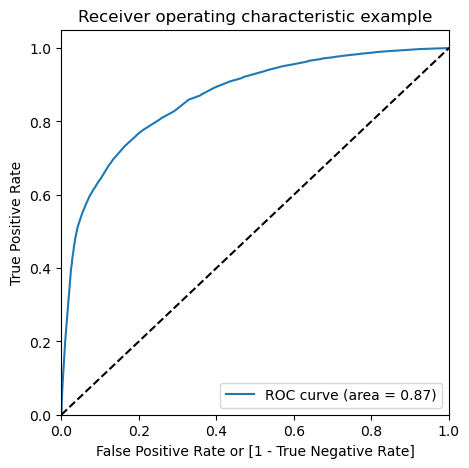

In [146]:
draw_roc(y_train_pred_final.Disease, y_train_pred_final.disease_prob)

## Scaling the test data

In [147]:
num_cols = X_test.select_dtypes(include=["float64", "int64"]).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,...,RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic",RaceEthnicityCategory_Other,"RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,AlcoholDrinkers_Yes,CovidPos_Yes,HadObesity_Yes
200628,-0.502834,-0.526453,0.726010,-1.498102,-1.902224,-1.615191,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
68897,2.199674,2.495877,-1.523688,-0.005388,-0.003670,-0.000030,0,0,0,1,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
290464,-0.502834,-0.526453,-0.773788,0.945916,0.151185,-0.334921,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
171540,-0.502834,-0.526453,-0.023889,-1.302580,-0.301083,0.422353,0,0,1,0,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
406996,-0.502834,-0.526453,0.726010,-0.227212,-1.069990,-1.085595,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [148]:
X_test = X_test[col]
X_test.head()

,Sex_Male,GeneralHealth_Fair,GeneralHealth_Poor,HadAngina_Yes,HadStroke_Yes,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older
200628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68897,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
290464,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
171540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
406996,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [149]:
X_test_sm = sm.add_constant(X_test)

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

200628    0.002800
68897     0.050601
290464    0.027355
171540    0.002800
406996    0.014387
11644     0.074850
79521     0.005746
178431    0.022959
2524      0.112039
431423    0.018252
dtype: float64

In [152]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.0028004 , 0.05060147, 0.02735496, 0.0028004 , 0.01438713,
       0.07485038, 0.00574602, 0.02295927, 0.11203928, 0.01825197])

In [153]:
y_test_pred_final = pd.DataFrame({"Disease": y_test.values, "disease_prob": y_test_pred})
y_test_pred_final.head()

,Disease,disease_prob
0,0,0.002800
1,0,0.050601
2,0,0.027355
3,0,0.002800
4,0,0.014387


In [155]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.disease_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Disease,disease_prob,final_Predicted
0,0,0.002800,0
1,0,0.050601,0
2,0,0.027355,0
3,0,0.002800,0
4,0,0.014387,0


In [157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Disease, y_test_pred_final.final_Predicted)

0.946793997271487

In [160]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Disease, y_test_pred_final.final_Predicted )
confusion2

array([[123458,   1093],
       [  5927,   1462]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.19786168629043172

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.9912244783261476

## Final Observation: Let us compare the values obtained for Train & Test:

Train Data: Accuracy : 94% Sensitivity : 0.19% Specificity : 99%

Test Data: Accuracy : 94% Sensitivity : 0.19% Specificity : 99%